In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [21]:
df=pd.read_csv('income.csv')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 660.0+ bytes


Text(0, 0.5, 'Income($)')

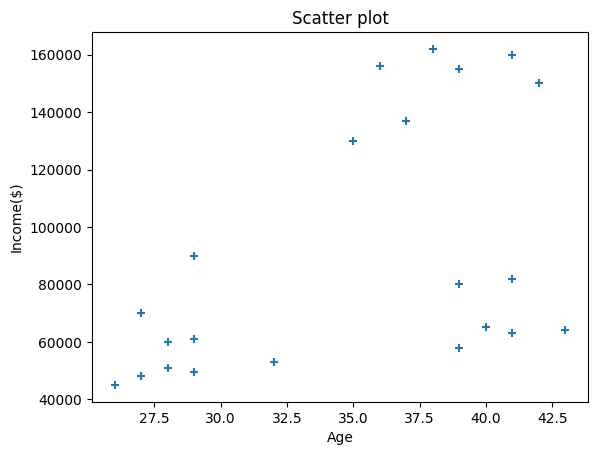

In [23]:
plt.scatter(df.Age,df['Income($)'],marker='+')
plt.title('Scatter plot')
plt.xlabel('Age')
plt.ylabel('Income($)')

In [24]:
from sklearn.cluster import KMeans

In [25]:
km=KMeans(n_clusters=3)

In [42]:
df['Data']=km.fit_predict(df[['Age','Income($)']])

In [43]:
df

,Name,Age,Income($),Data
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


In [44]:
df0=df[df['Data']==0]
df1=df[df['Data']==1]
df2=df[df['Data']==2]

C:\Users\subha\AppData\Local\Temp\ipykernel_5880\1073242928.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


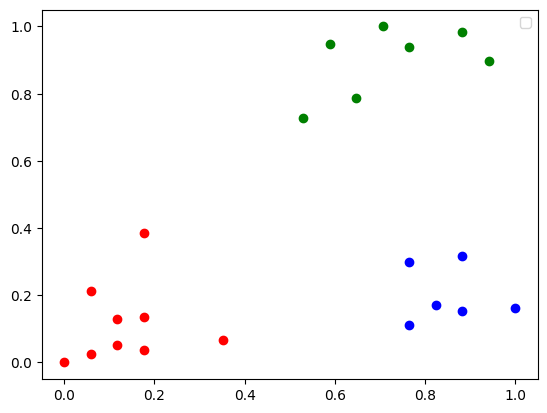

In [45]:
plt.scatter(df0['Age'],df0['Income($)'],color='red')
plt.scatter(df1['Age'],df1['Income($)'],color='blue')
plt.scatter(df2['Age'],df2['Income($)'],color='green')
plt.legend()

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [47]:
scaler.fit(df[['Age']])

MinMaxScaler()

In [48]:
df['Age']=scaler.transform(df[['Age']])

In [49]:
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])

In [50]:
df

,Name,Age,Income($),Data
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


C:\Users\subha\AppData\Local\Temp\ipykernel_5880\1073242928.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


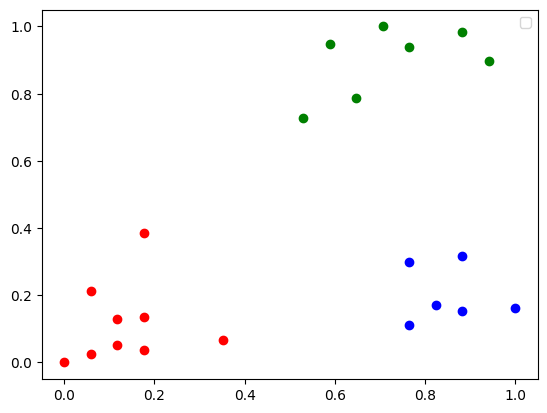

In [51]:
plt.scatter(df0['Age'],df0['Income($)'],color='red')
plt.scatter(df1['Age'],df1['Income($)'],color='blue')
plt.scatter(df2['Age'],df2['Income($)'],color='green')
plt.legend()

In [54]:
sse=[]
k=range(1,10)
for i in k:
    km=KMeans(n_clusters=i)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [55]:
sse

[5.434011511988176,
 2.091136388699076,
 0.4750783498553094,
 0.4472177173485349,
 0.32978820387164315,
 0.22443334487241418,
 0.1735559655531264,
 0.15708328520116888,
 0.1263742575534637]

Text(0.5, 1.0, 'Elbow Finding Graph')

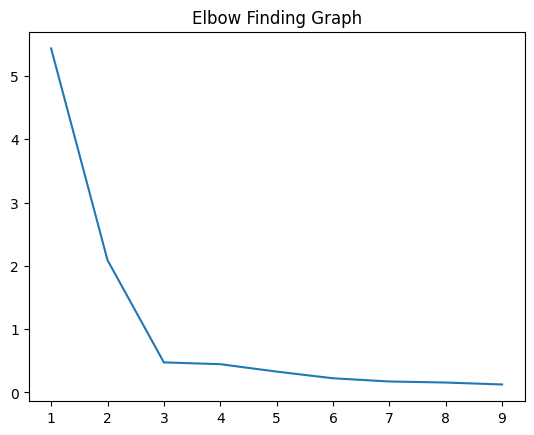

In [57]:
plt.plot(k,sse)
plt.title('Elbow Finding Graph')